In [ ]:
pip install pyeasyga

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyeasyga: filename=pyeasyga-0.3.1-py2.py3-none-any.whl size=6803 sha256=9502bf9ed8b08da0b6268e822d6efc63c996e0da2495a699381295af365e8f4d
  Stored in directory: /root/.cache/pip/wheels/a7/92/a5/adeab3fb04006374ec9a017fbb3a8139643ccfd6ad83a0c85f
Successfully built pyeasyga


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

from time import time


'''T = 2 # number of jobs
ni =[2,2] # number of operations of the job i
ma = 2 # number of machines
Mij = [[1,2],[1],[2],[1,2]]
pjk = [[3,4],[5,1000],[1000,6],[2,2]]'''

T = 3 # number of jobs
ni =[2,2,2] # number of operations of the job i
ma = 2 # number of machines
Mij = [[1,2],[1,2],[1],[1,2],[2],[1,2]]
pjk = [[3,4],[5,4],[2,1000],[2,4],[1000,3],[1,2]]

#T = 4 # number of jobs
#ni =[1,3,2,2] # number of operations of the job i
#ma = 3 # number of machines
#Mij = [[1,2,3],[1,3],[3],[1,2],[1,3],[1,2],[1,2,3],[1,3]]
#pjk = [[3,4,3],[5,1000,5],[1000,1000,6],[2,4,3],[1,1000,3],[1,2,1000],[2,2,2],[1,1000,1000]]

#T = 3 # number of jobs
#ni =[2,3,4] # number of operations of the job i
#ma = 5 # number of machines
#Mij = [[1,2,3,4,5],[1,3,4],[3,2],[1,2,5],[1,3,4],[1,2],[1,2,3],[1,3,5],[1,5]]
#pjk = [[3,4,3,4,4],[5,1000,5,4,1000],[1000,4,6,1000,1000],[2,4,1000,1000,4],
#       [1,1000,3,4,1000],[1,2,1000,1000,1000],[2,2,2,1000,1000],[1,1000,1,1000,2],
#       [4,1000,1000,1000,3]]

'''T = 4 # number of jobs
ni =[2,3,4,2] # number of operations of the job i
ma = 6 # number of machines
Mij = [[1,2,3,4,5],[1,3,4,6],[1,3,2],[1,2,5],[1,2,3,4],[1,2,5],[1,2,3,6],[1,3,5],[1,5,6],
       [1,6],[2,3,4]]
pjk = [[3,4,3,4,4,1000],[5,1000,5,4,1000,4],[3,4,6,1000,1000,1000],[2,4,1000,1000,4,1000],
       [1,3,3,2,1000,1000],[1,3,1000,1000,2,1000],[2,2,2,1000,1000,2],[1,1000,1,1000,2,1000],
       [4,1000,1000,1000,3,3],[3,1000,1000,1000,1000,4],[1000,5,3,4,1000,1000]] '''

from pyeasyga import pyeasyga # import the library to be used
import random

data=[]

data.append(T)
data.append(ni)
data.append(ma)
data.append(Mij)
data.append(pjk)

def is_data_ok(data):
  sum_ni=0
  for i in range(0,len(data[1])):
    sum_ni+=data[1][i]
  if len(data[1])!=data[0]:
    print("Data invalid. Please check the length of ni list")
    exit
  elif len(data[3])!=sum_ni:
    print("Data invalid. Please check the length of Mij list")
    exit
  elif len(data[4])!=sum_ni:
    print("Data invalid. Please check the length of pjk list")
    exit

is_data_ok(data)


def max_processing_time(data):
    pjk=data[4]
    max_time=0
    for i in range(0,len(pjk)):
        for j in range(0,len(pjk[i])):
            if pjk[i][j]>max_time and pjk[i][j]!=1000:
                max_time=pjk[i][j]
    return max_time


def create_individual(data):
    individual=[]
    start_times=[0]*data[2]
    jobs=data[0]
    list_to=[2,1,2,0,1,2,0,1,1,0]
    random_number=random.randint(0,len(list_to)-1)
    reference=list_to[random_number]
    if reference == 1:
      a=0
      for i in range(0,jobs):
          for j in range(0,data[1][i]):
              position_X=random.randint(0,len(data[3][a])-1)
              X=data[3][a][position_X]
              S=start_times[X-1]
              individual.append(S)
              individual.append(X)
              start_times[X-1]=start_times[X-1]+data[4][a][X-1]
              a+=1
    elif reference == 2:
      a=len(data[3])-1
      for i in range(0,jobs):
          for j in range(0,data[1][i]):
              position_X=random.randint(0,len(data[3][a])-1)
              X=data[3][a][position_X]
              S=start_times[X-1]
              individual.append(S)
              individual.append(X)
              start_times[X-1]=start_times[X-1]+data[4][a][X-1]
              a-=1
    else:
      for i in range(0,jobs):
          for j in range(0,data[1][i]):
              X=random.randint(1,data[2])
              max_time=max_processing_time(data)
              S=random.randint(0,max_time)
              individual.append(S)
              individual.append(X)
    return individual

def mutate(individual):
  mutate_index1=random.randrange(len(individual))
  mutate_index2=random.randrange(len(individual))
  #max_time=max_processing_time(data)
  if ((mutate_index1%2)==0 and (mutate_index2%2)==0) or ((mutate_index1%2)!=0 and \
      (mutate_index2%2!=0)):
    individual[mutate_index1], individual[mutate_index2] = individual[mutate_index2], individual[mutate_index1]
  elif (mutate_index1%2)==0 and (mutate_index2%2)!=0:
    #if individual[mutate_index1]>(max_time/2):
     # individual[mutate_index1]=individual[mutate_index1]+random.randint(-(max_time/2),(max_time/2))
    new_index=random.randrange(0,len(individual),2)
    individual[mutate_index1], individual[new_index] = individual[new_index], individual[mutate_index1]
    individual[mutate_index2]=random.randint(1,data[2])
  else:
    #if individual[mutate_index2]>(max_time/2):
     # individual[mutate_index2]=individual[mutate_index2]+random.randint(-(max_time/2),(max_time/2))
    new_index=random.randrange(0,len(individual),2)
    individual[mutate_index2], individual[new_index] = individual[new_index], individual[mutate_index2]
    individual[mutate_index1]=random.randint(1,data[2])


def is_feasible_machine(operation,machine,data):
    Mij=data[3]
    count=0
    for i in range(0,len(Mij[operation])):
        if machine==Mij[operation][i]:
            count+=1
    if count == 0:
        return False
    else:
        return True

def operations_in_machine(machine,individual):
    result=[]
    i=0
    while i<len(individual):
        if individual[i+1]==machine:
            result.append(int(i/2))
        i+=2
    return result

def fitness(individual,data):
    fitness=0
    pjk=data[4]
    i=0
    for op in range(0,len(pjk)):
        if (individual[i]+pjk[op][individual[i+1]-1])>fitness:
            fitness=individual[i]+pjk[op][individual[i+1]-1]
        i+=2

    fouls=0
    j=0
    k=0
    for job in range(0,len(ni)):
        for op2 in range(0,ni[job]-1):
          if (individual[j]+pjk[k][individual[j+1]-1])>individual[j+2] or\
            individual[j]>=individual[j+2]:
              fouls+=4
          j+=2
          k+=1
        j+=2
        k+=1

    l=0
    while l<len(individual):
        if not is_feasible_machine(int(l/2),individual[l+1],data):
            fouls+=2
        l+=2


    count_zeros=0
    for machine2 in range(1,data[2]+1):
      #count_zeros=0
      operations2=operations_in_machine(machine2,individual)
      for op4 in range(0,len(operations2)):
        if individual[operations2[op4]*2]==0:
          count_zeros+=1
        start_reference=individual[operations2[op4]*2]
        end_reference=individual[operations2[op4]*2]+pjk[operations2[op4]][machine2-1]
        for op5 in range(0,len(operations2)):
          if op5 != op4:
            s=individual[operations2[op5]*2]
            c=individual[operations2[op5]*2]+pjk[operations2[op5]][machine2-1]
            if s<=start_reference and c>=end_reference:
              fouls+=2
            elif s>=start_reference and s<=end_reference and c<=end_reference:
              fouls+=2
            elif s<=start_reference and c>start_reference and c<=end_reference:
              fouls+=2
            elif s>=start_reference and s<end_reference and c>=end_reference:
              fouls+=2
      #if count_zeros != 1:
        #fouls+=1
    if count_zeros == 0:
      fouls+=1
    fitness=fitness+(fouls*1000)
    return fitness


steps=[]
count_increment=0

def genetic_algorithm_scheduling(data,counter,pop_size=100,num_generations=500):
  start_time=time()
  ga=pyeasyga.GeneticAlgorithm(data,maximise_fitness=False,population_size=pop_size,generations=num_generations,mutation_probability=0.3) # initialization of the algorithm
  ga.create_individual=create_individual
  ga.mutate_function=mutate
  ga.fitness_function=fitness
  ga.run()
  best_individual=ga.best_individual()
  steps.append(best_individual)
  best_fitness=best_individual[0]
  if best_fitness>1000 and counter<10:
    counter+=1
    new_generations=num_generations+100
    print("Incrementing generations to ",new_generations,"......")
    genetic_algorithm_scheduling(data,counter,pop_size,new_generations)
  elif best_fitness>1000 and counter==10:
    print("Feasible individual wasn't found!")
    print("Best infeasible individual: ",ga.best_individual())
    end_time=time()
    print("The execution time was: ",(end_time-start_time)," seconds")
  elif best_fitness<1000:
    end_time=time()
    print("Best feasible individual found! ",ga.best_individual())
    print("The execution time was: ",(end_time-start_time)," seconds")
    print("These were the different best individuals:")
    for i in range(0,len(steps)):
      print(steps[i])
    return steps


steps = genetic_algorithm_scheduling(data,count_increment,pop_size=200)


Best feasible individual found!  (10, [0, 1, 3, 2, 3, 1, 8, 1, 0, 2, 8, 2])
The execution time was:  6.593930244445801  seconds
These were the different best individuals:
(10, [0, 1, 3, 2, 3, 1, 8, 1, 0, 2, 8, 2])


In [ ]:
print(steps[0][1])

[0, 3, 3, 3, 0, 1, 4, 2, 8, 4, 0, 2, 4, 1, 6, 1, 7, 1, 4, 6, 8, 3]


In [ ]:
print(pjk[5][1]
      )

3


In [ ]:
best_schedule = steps[0][1]
start_time = []
processor = []
end_time = []
k=0
l=0
for i in range(0,T):
  li = []
  proc = []
  end = []
  for j in range(0,ni[i]):
    li.append(best_schedule[k])
    proc.append(best_schedule[k+1])
    end_t = best_schedule[k] + pjk[l][best_schedule[k+1]-1]
    end.append(end_t)
    k=k+2
    l=l+1
  start_time.append(li)
  processor.append(proc)
  end_time.append(end)

print(start_time)
print(processor)
print(end_time)

[[0, 3], [0, 4, 8], [0, 4, 6, 7], [4, 8]]
[[3, 3], [1, 2, 4], [2, 1, 1, 1], [6, 3]]
[[3, 8], [3, 8, 10], [3, 6, 7, 11], [8, 11]]


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

def plot_schedule(schedule):

  for proc in range(1,ma+1):
    #df = pd.DataFrame()
    start_times = []
    end_times = []
    y_labels= []
    for i in range(0,T) :
      for j in range(0,ni[i]):
        if processor[i][j] == proc:
          #df.append(dict(Task = 'T'+str(i)+str[j], Start = start_time[i][j], Finish = ))
          start_times.append(start_time[i][j])
          end_times.append(end_time[i][j])
          y_labels.append('T'+str(i)+str(j))

    print(start_times)
    print(end_times)
    if len(start_times) > 0:
      fig, ax = plt.subplots(figsize=(8, 4))

      for i in range(len(start_times)):
        y = np.zeros(2) + i
        x = [start_times[i], end_times[i]]
        ax.plot(x, y,color='b', linewidth=6)


    #ax.set_xlim([0,max(end_times)])
      ax.set_xticks(range(len(range(0,max(end_times)+1))))
      ax.set_xticklabels(range(0,max(end_times)+1))
      ax.set_yticks(range(len(y_labels)))
      ax.set_yticklabels(y_labels)
      ax.set_xlabel('Timeline for processor {:d}'.format(proc))
      ax.set_ylabel('Tasks')
      plt.show()








[0, 4, 6, 7]
[3, 6, 7, 11]


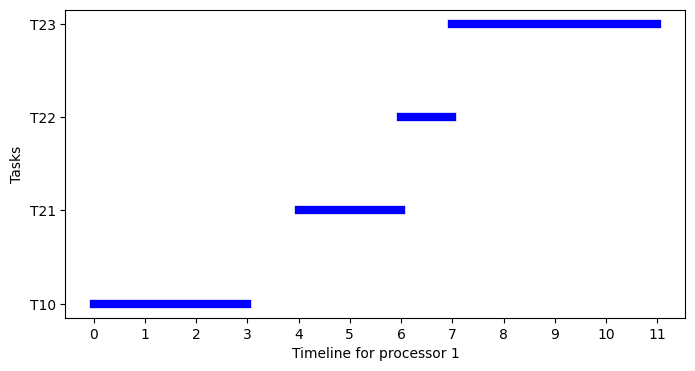

[4, 0]
[8, 3]


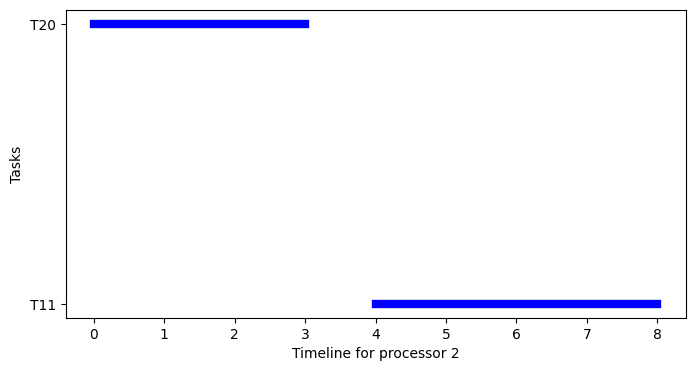

[0, 3, 8]
[3, 8, 11]


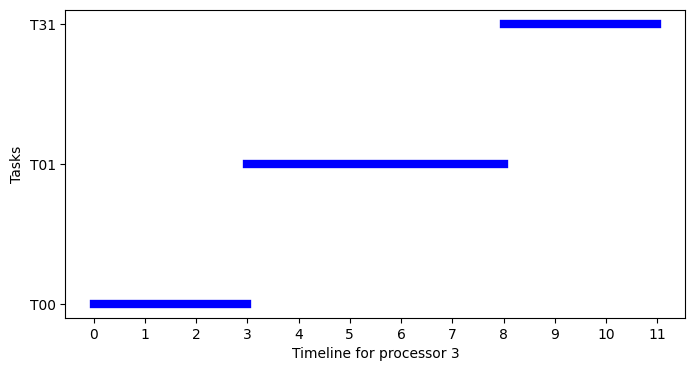

[8]
[10]


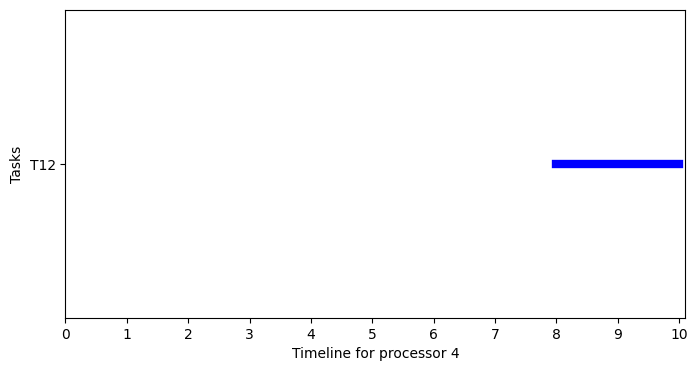

[]
[]
[4]
[8]


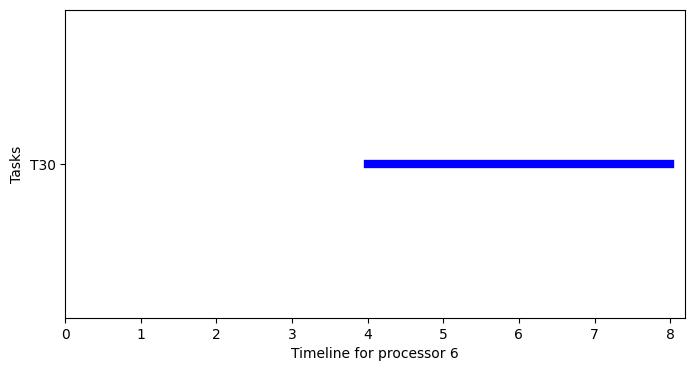

In [ ]:
plot_schedule(best_schedule)

## EDF Algorithm

In [ ]:
import heapq

class PeriodicTask:
    def __init__(self, task_id, period, deadline, computation_time):
        self.task_id = task_id
        self.period = period
        self.deadline = deadline
        self.computation_time = computation_time
        self.next_deadline = deadline
        self.start_time = []
        self.end_time = []

    def __lt__(self, other):
        return self.next_deadline < other.next_deadline

    def execute(self, time):
        print(f"Executing task {self.task_id} at time {time}")
        self.start_time.append(time)
        self.end_time.append(time+self.computation_time)
        self.next_deadline += self.period

    def reset(self):
        self.next_deadline = self.deadline

def edf(periodic_tasks, max_time):
    task_queue = []
    completed_tasks = []

    for task in periodic_tasks:
        heapq.heappush(task_queue, (task.deadline, task))

    time = 0

    while time < max_time:
        if not task_queue:
            print("No tasks available to execute.")
            break

        _, task = heapq.heappop(task_queue)

        if task.next_deadline <= time:
            print(f"Deadline missed for task {task.task_id} at time {time}")

        task.execute(time)

        if task.next_deadline <= max_time:
            heapq.heappush(task_queue, (task.next_deadline, task))
        else:
            completed_tasks.append(task)

        time += task.computation_time

    return completed_tasks


In [ ]:

task1 = PeriodicTask(1, 5, 5, 2)
task2 = PeriodicTask(2, 10, 10, 3)
task3 = PeriodicTask(3, 20, 20, 4)


completed_tasks = edf([task1, task2, task3], 50)

print("Completed tasks:")
for task in completed_tasks:
    print(f"Task {task.task_id}")


Executing task 1 at time 0
Executing task 2 at time 2
Executing task 1 at time 5
Executing task 1 at time 7
Executing task 2 at time 9
Executing task 3 at time 12
Executing task 1 at time 16
Executing task 1 at time 18
Executing task 2 at time 20
Executing task 1 at time 23
Executing task 1 at time 25
Executing task 2 at time 27
Executing task 3 at time 30
Executing task 1 at time 34
Executing task 1 at time 36
Executing task 2 at time 38
Executing task 1 at time 41
No tasks available to execute.
Completed tasks:
Task 3
Task 2
Task 1


In [ ]:
combined_tasks = []
t = completed_tasks.sort()
for task in completed_tasks:
  for x,y in zip(task.start_time, task.end_time):
    t = (x,y,task.task_id-1)
    combined_tasks.append(t)
    #print(t)


print(len(combined_tasks))

17


In [ ]:
import matplotlib.pyplot as plt

def plot_gantt_chart(schedule, deadlines):

    fig, ax = plt.subplots(figsize=(8,4))


    ax.set_title('Earliest Deadline First Schedule')
    ax.set_xlabel('Time')
    ax.set_ylabel('Tasks')


    ax.set_xlim(0, schedule[-1][1])


    task_dict = {}
    for start, end, task_id in schedule:
        if task_id not in task_dict:
            task_dict[task_id] = []
        task_dict[task_id].append((start, end))


    for i, task_id in enumerate(sorted(task_dict.keys())):
        for start, end in task_dict[task_id]:
            ax.broken_barh([(start, end-start)], (i+0.1, 0.1), facecolors='tab:blue')
        #ax.text((task_dict[task_id][0][0] + task_dict[task_id][0][1]) / 2, i+0.5, f'D{deadlines[task_id]}', ha='center', va='center', color='white')


    y_ticks = [f'Task {i+1}' for i in range(len(task_dict))]
    ax.set_yticks(range(len(task_dict)))
    ax.set_yticklabels(y_ticks)
    plt.show()


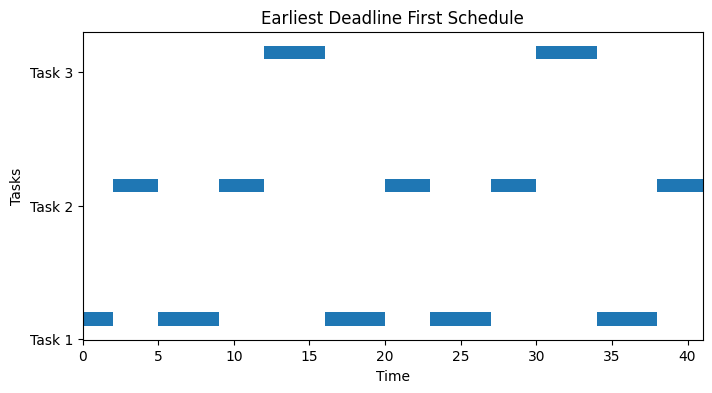

In [ ]:
schedule = combined_tasks
deadlines = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18]
plot_gantt_chart(schedule, deadlines)


# RTA

In [ ]:
import math

In [ ]:
def rta(tasks):

    sorted_tasks = sorted(tasks, key=lambda t: t['period'])


    response_times = [t['exec_time'] for t in sorted_tasks]

    while True:
        for i, task in enumerate(sorted_tasks):
            new_response_time = task['exec_time'] + math.ceil(response_times[i] / task['period']) * task['exec_time']
            if new_response_time != response_times[i]:
                response_times[i] = new_response_time


        if all(response_times[i] <= task['deadline'] for i, task in enumerate(sorted_tasks)):
            return True

        if all(response_times[i] == task['deadline'] or response_times[i] == response_times_old[i] for i, task in enumerate(sorted_tasks)):
            return False


        response_times_old = list(response_times)


In [ ]:
tasks = [
    {'exec_time': 2, 'period': 5, 'deadline': 4},
    {'exec_time': 3, 'period': 10, 'deadline': 9},
    {'exec_time': 4, 'period': 20, 'deadline': 19},
]

if rta(tasks):
    print("Schedule is feasible")
else:
    print("Schedule is not feasible")


Schedule is feasible


In [ ]:
import time

In [ ]:
import json
import copy
from sys import *
from math import gcd
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from collections import defaultdict

tasks = dict()
RealTime_task = dict()
metrics = defaultdict(dict)
d = dict()
dList = []
T = []
C = []
U = []
# For gantt chart
y_axis  = []
from_x = []
to_x = []

def Read_data():

	global n
	global hp
	global tasks
	global dList

	dList = {}

	n = int(input("\n \t\tEnter number of Tasks:"))

	for  i in range(n):
		dList["TASK_%d"%i] = {"start":[],"finish":[]}

	dList["TASK_IDLE"] = {"start":[],"finish":[]}

	for i in range(n):
		tasks[i] = {}
		print("\n\n\n Enter Period of task T",i,":")
		p = input()
		tasks[i]["Period"] = int(p)
		print("Enter the WCET of task C",i,":")
		w = input()
		tasks[i]["WCET"] = int(w)


	with open('tasks.json','w') as outfile:
		json.dump(tasks,outfile,indent = 4)

def Hyperperiod():

	temp = []
	for i in range(n):
		temp.append(tasks[i]["Period"])
	HP = temp[0]
	for i in temp[1:]:
		HP = HP*i//gcd(HP, i)
	print ("\n Hyperperiod:",HP)
	return HP

def Schedulablity():

	for i in range(n):
		T.append(int(tasks[i]["Period"]))
		C.append(int(tasks[i]["WCET"]))
		u = int(C[i])/int(T[i])
		U.append(u)

	U_factor = sum(U)
	if U_factor<=1:
		print("\nUtilization factor: ",U_factor, "underloaded tasks")

		sched_util = n*(2**(1/n)-1)
		print("Checking condition: ",sched_util)

		count = 0
		T.sort()
		for i in range(len(T)):
			if T[i]%T[0] == 0:
				count = count + 1


		if U_factor <= sched_util or count == len(T):
			print("\n\tTasks are schedulable by Rate Monotonic Scheduling!")
			return True
		else:
			print("\n\tTasks are not schedulable by Rate Monotonic Scheduling!")
			return False
	print("\n\tOverloaded tasks!")
	print("\n\tUtilization factor > 1")
	return False

def estimatePriority(RealTime_task):

	tempPeriod = hp
	P = -1    #Returns -1 for idle tasks
	for i in RealTime_task.keys():
		if (RealTime_task[i]["WCET"] != 0):
			if (tempPeriod > RealTime_task[i]["Period"] or tempPeriod > tasks[i]["Period"]):
				tempPeriod = tasks[i]["Period"] #Checks the priority of each task based on period
				P = i
	return P


def Simulation(hp):



	global RealTime_task
	RealTime_task = copy.deepcopy(tasks)

	for i in RealTime_task.keys():
		RealTime_task[i]["DCT"] = RealTime_task[i]["WCET"]
		if (RealTime_task[i]["WCET"] > RealTime_task[i]["Period"]):
			print(" \n\t The task can not be completed in the specified time ! ", i )


	for t in range(hp):


		priority = estimatePriority(RealTime_task)

		if (priority != -1):    #processor is not idle
			print("\nt{}-->t{} :TASK{}".format(t,t+1,priority))

			RealTime_task[priority]["WCET"] -= 1

			dList["TASK_%d"%priority]["start"].append(t)
			dList["TASK_%d"%priority]["finish"].append(t+1)

			y_axis.append("TASK%d"%priority)
			from_x.append(t)
			to_x.append(t+1)

		else:    #processor is idle
			print("\nt{}-->t{} :IDLE".format(t,t+1))

			dList["TASK_IDLE"]["start"].append(t)
			dList["TASK_IDLE"]["finish"].append(t+1)

			y_axis.append("IDLE")
			from_x.append(t)
			to_x.append(t+1)


		for i in RealTime_task.keys():
			RealTime_task[i]["Period"] -= 1
			if (RealTime_task[i]["Period"] == 0):
				RealTime_task[i] = copy.deepcopy(tasks[i])

		with open('RM_sched.json','w') as outfile2:
			json.dump(dList,outfile2,indent = 4)


def drawGantt():

	colors = ['red','green','blue','orange','yellow']
	fig = plt.figure()
	ax = fig.add_subplot(111)

	ax = plt.hlines(y_axis, from_x, to_x, linewidth=20, color = colors[n-1])
	plt.title('Rate Monotonic scheduling')
	plt.grid(True)
	plt.xlabel("Real-Time clock")
	plt.ylabel("HIGH------------------Priority--------------------->LOW")
	plt.xticks(np.arange(min(from_x), max(to_x)+1, 1.0))
	plt.show()


def showMetrics():

	N = []
	startTime = []
	releaseTime = []
	finishTime = []
	avg_respTime = []
	avg_waitTime = []


	for i in tasks.keys():
		release =int(hp)/int(tasks[i]["Period"])
		N.append(release)
		temp = []
		for j in range(int(N[i])):
			temp.append(j*int(tasks[i]["Period"]))
		# temp.append(hp)
		releaseTime.append(temp)

	for j,i in enumerate(tasks.keys()):
		start_array,end_array = filter_out(dList["TASK_%d"%i]["start"],dList["TASK_%d"%i]["finish"],N[j])
		startTime.append(start_array)
		finishTime.append(end_array)


	for i in tasks.keys():
		avg_waitTime.append(st.mean([a_i - b_i for a_i, b_i in zip(startTime[i],releaseTime[i])]))
		avg_respTime.append(st.mean([a_i - b_i for a_i, b_i in zip(finishTime[i],releaseTime[i])]))


	for i in tasks.keys():
		metrics[i]["Releases"] = N[i]
		metrics[i]["Period"] = tasks[i]["Period"]
		metrics[i]["WCET"] = tasks[i]["WCET"]
		metrics[i]["AvgRespTime"] = avg_respTime[i]
		metrics[i]["AvgWaitTime"] = avg_waitTime[i]

		print("\n Number of releases of task %d ="%i,int(N[i]))
		print("\n Release time of task%d = "%i,releaseTime[i])
		print("\n start time of task %d = "%i,startTime[i])
		print("\n finish time of task %d = "%i,finishTime[i])
		print("\n Average Response time of task %d = "%i,avg_respTime[i])
		print("\n Average Waiting time of task %d = "%i,avg_waitTime[i])
		print("\n")


	with open('Metrics.json','w') as f:
		json.dump(metrics,f,indent = 4)
	print("\n\n\t\tScheduling of %d tasks completed succesfully...."%n)


def filter_out(start_array,finish_array,release_time):

	new_start = []
	new_finish = []
	beg_time = min(start_array)
	diff = int(hp/release_time)

	if(release_time>1):
		new_start.append(beg_time)
		prev = beg_time
		for i in range(int(release_time-1)):
			beg_time = beg_time + diff
			new_start.append(beg_time)
			count = start_array.index(prev)
			for i in range(start_array.index(prev),start_array.index(beg_time)-1):
					count+=1
			new_finish.append(finish_array[count])
			prev = beg_time
		new_finish.append(max(finish_array))

	else:
		end_time = max(finish_array)
		new_start.append(beg_time)
		new_finish.append(int(end_time))
	return new_start,new_finish


if __name__ == '__main__':

	print("\n\n\t\t_RATE MONOTONIC SCHEDULER_\n")

	Read_data()
	sched_res = Schedulablity()
	if sched_res == True:

		hp = Hyperperiod()
		Simulation(hp)
		showMetrics()
		drawGantt()

	else:

		Read_data()
		sched_res = Schedulablity()



		_RATE MONOTONIC SCHEDULER_


 		Enter number of Tasks:3



 Enter Period of task T 0 :
10
Enter the WCET of task C 0 :
2



 Enter Period of task T 1 :
15
Enter the WCET of task C 1 :
3



 Enter Period of task T 2 :
12
Enter the WCET of task C 2 :
5

Utilization factor:  0.8166666666666667 underloaded tasks
Checking condition:  0.7797631496846196

	Tasks are not schedulable by Rate Monotonic Scheduling!

 		Enter number of Tasks:5



 Enter Period of task T 0 :
10
Enter the WCET of task C 0 :
2



 Enter Period of task T 1 :
15
Enter the WCET of task C 1 :
3



 Enter Period of task T 2 :
20
Enter the WCET of task C 2 :
1



 Enter Period of task T 3 :
25
Enter the WCET of task C 3 :
2



 Enter Period of task T 4 :
10
Enter the WCET of task C 4 :
1

	Overloaded tasks!

	Utilization factor > 1
